<a href="https://colab.research.google.com/github/KimaniKibuthu/house-prices/blob/main/Housing_Prices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Prices Prediction
Prediction on the prices of houses. A regression problem.

It shall be tackled in the following steps:
* Data Retrieval
* Exploratory Data Analysis
* Modelling

# Necessary Packages
Install the various libraries that will be used

In [1]:
!pip install catboost

     |████████████████████████████████| 65.7MB 69kB/s 


In [2]:
!pip install dabl


     |████████████████████████████████| 563kB 8.8MB/s 
     |████████████████████████████████| 22.3MB 1.5MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [60]:
# General libraries
import os
import shutil
import zipfile

# EDA libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import dabl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectFromModel, SequentialFeatureSelector
from sklearn.decomposition import PCA
%matplotlib inline

# Modelling libraries
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

# Data Retrieval

Obtain the data from kaggle.

In [4]:
# Set up the environment to load data from kaggle


In [5]:
# Download the data from the kaggle competition

!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 31.4MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 60.4MB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 61.8MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 11.2MB/s]


In [6]:
 # Save data to a variable

house_train = pd.read_csv('/content/train.csv')
house_test = pd.read_csv('/content/test.csv')
sample_sub = pd.read_csv('/content/sample_submission.csv')

# Copy of the houses_train
train_copy = house_train.copy()

# Exploratory Data Analysis
In this phase, we will clean the data, explore it and get it ready for modelling

In [7]:
# View the data
train_copy.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
# info
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Clean the data

### Handling Missing Values

In [9]:
# See the missing percentages
def percentage_missing(data):
  # Get the missing values
  missing = (data.isnull().sum()/len(data)) * 100 
  # Convert to dataframe
  missing_data = pd.DataFrame(missing, columns=['percentage_missing'])
  # Display all rows
  pd. set_option('display.max_rows', missing_data.shape[0] + 1)
  return missing_data



In [10]:
# Create dataFrame
missing = percentage_missing(train_copy)

print(missing)

               percentage_missing
Id                       0.000000
MSSubClass               0.000000
MSZoning                 0.000000
LotFrontage             17.739726
LotArea                  0.000000
Street                   0.000000
Alley                   93.767123
LotShape                 0.000000
LandContour              0.000000
Utilities                0.000000
LotConfig                0.000000
LandSlope                0.000000
Neighborhood             0.000000
Condition1               0.000000
Condition2               0.000000
BldgType                 0.000000
HouseStyle               0.000000
OverallQual              0.000000
OverallCond              0.000000
YearBuilt                0.000000
YearRemodAdd             0.000000
RoofStyle                0.000000
RoofMatl                 0.000000
Exterior1st              0.000000
Exterior2nd              0.000000
MasVnrType               0.547945
MasVnrArea               0.547945
ExterQual                0.000000
ExterCond     

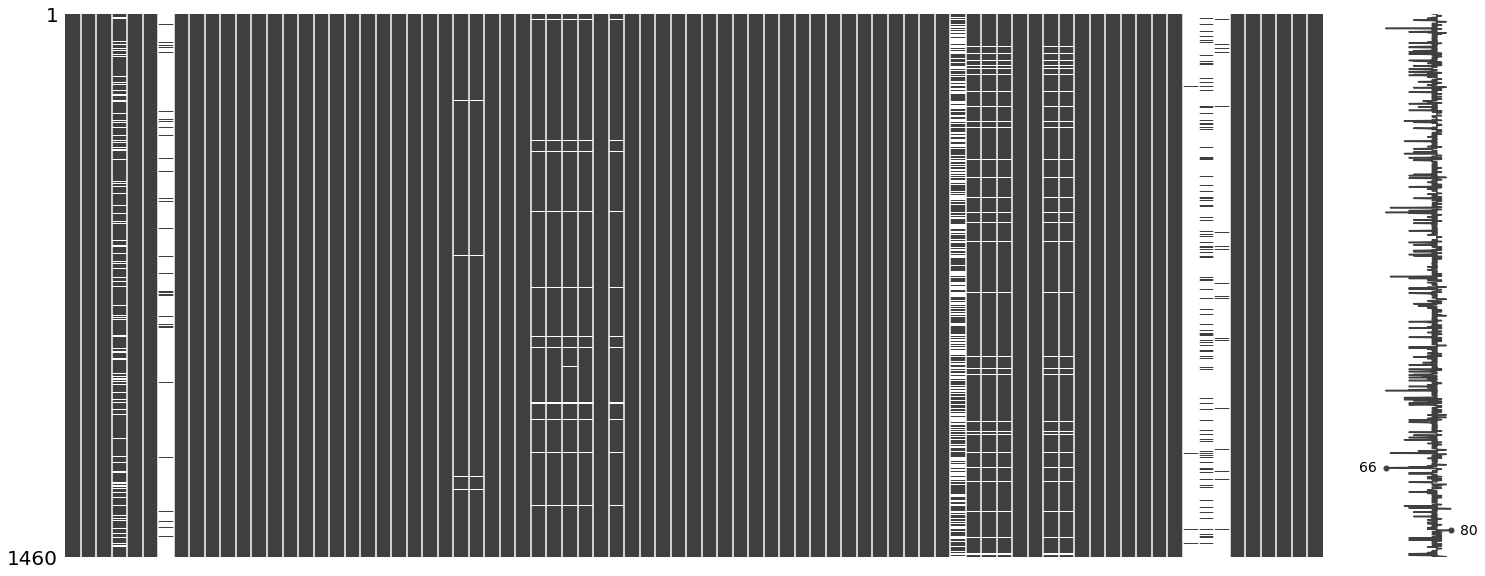

In [11]:
# Visualize the missing data
msno.matrix(train_copy)


In [12]:
# Explore the columns with missing values
missing_columns = missing.loc[missing['percentage_missing']>0].index.to_list()

print(missing_columns)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


#### LotFrontage

In [13]:
# Explore LotFrontage
train_copy['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [14]:
# Drop Lot Frontage as Lot Area will offer similar info
train_copy = train_copy.drop('LotFrontage', axis=1)

#### Alley

In [15]:
# Explore Alley
train_copy['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

Since, nan in Alley represent no access to an alley, we shall replace them with None to signify lack of an alley

In [16]:
# Fill missing values with none
train_copy['Alley'].fillna('None', inplace=True)

#### MasVnrType and MasVnrArea

In [17]:
# View 
train_copy['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [18]:
train_copy['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

Fill the missing values for the area with zero and for the type with none.

In [19]:
# Fill missing values
train_copy['MasVnrType'].fillna('None', inplace=True)
train_copy['MasVnrArea'].fillna(0, inplace=True)

#### BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 & BsmtFinType2

In [20]:
# View
print(train_copy['BsmtQual'].unique())
print('-' * 20)

print(train_copy['BsmtCond'].unique())
print('-' * 20)

print(train_copy['BsmtExposure'].unique())
print('-' * 20)

print(train_copy['BsmtFinType1'].unique())
print('-' * 20)

print(train_copy['BsmtFinType2'].unique())


['Gd' 'TA' 'Ex' nan 'Fa']
--------------------
['TA' 'Gd' nan 'Fa' 'Po']
--------------------
['No' 'Gd' 'Mn' 'Av' nan]
--------------------
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
--------------------
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']


In [21]:
# Fill na with none
basement_columns = ['BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 
                    'BsmtFinType2']

for column in basement_columns:
   train_copy[column].fillna('None', inplace=True)

#### FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature 

In [22]:
# View their Unique values
last = ['FireplaceQu', 'GarageType', 'GarageYrBlt', 'Electrical',
                 'GarageFinish', 'GarageQual', 'GarageCond',
                 'PoolQC', 'Fence', 'MiscFeature']

for column in last:
  print(train_copy[column].unique())

[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924.
 1996. 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927.
 1947. 1937. 1942. 1938. 1952. 1928. 1922. 1934. 1906. 1914. 1946. 1908.
 1929. 1933.]
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
['RFn' 'Unf' 'Fin' nan]
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
[nan 'Ex' 'Fa' 'Gd']
[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
[nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [23]:
for column in last:
   train_copy[column].fillna('None', inplace=True)

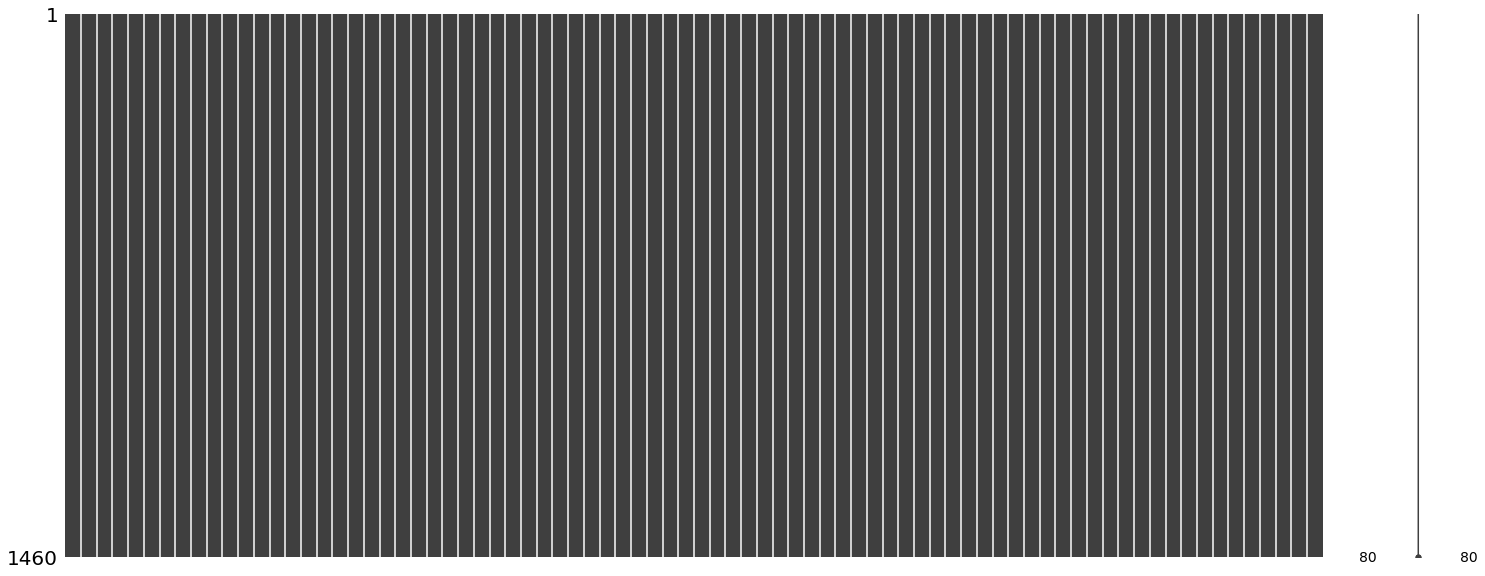

In [24]:
# Confirm a to whether all missing data was filled
msno.matrix(train_copy)

In [25]:
#sns.pairplot(train_copy)

In [26]:
clean_copy = dabl.clean(train_copy)

In [27]:
train_copy

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,None,None,None,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Ty

In [28]:
clean_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 68 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   MSSubClass                   1460 non-null   int64   
 1   MSZoning                     1460 non-null   category
 2   LotArea                      1460 non-null   int64   
 3   Alley                        1460 non-null   category
 4   LotShape                     1460 non-null   category
 5   LandContour                  1460 non-null   category
 6   LotConfig                    1460 non-null   category
 7   LandSlope                    1460 non-null   category
 8   Neighborhood                 1460 non-null   category
 9   Condition1                   1460 non-null   category
 10  BldgType                     1460 non-null   category
 11  HouseStyle                   1460 non-null   category
 12  OverallQual                  1460 non-null   int64   
 13  Ove

Target looks like regression


/usr/local/lib/python3.7/dist-packages/dabl/plot/supervised.py:547: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  FutureWarning)


Showing only top 10 of 21 continuous features


/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 2 outliers in column SalePrice.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 2 outliers in column GrLivArea.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 2 outliers in column TotalBsmtSF.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 3 outliers in column 1stFlrSF.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 2 outliers in column MasVnrArea.
  int(dropped), series.name), UserWarning)


Showing only top 10 of 46 categorical features


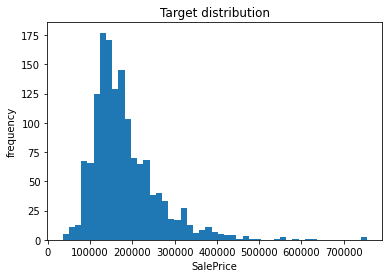

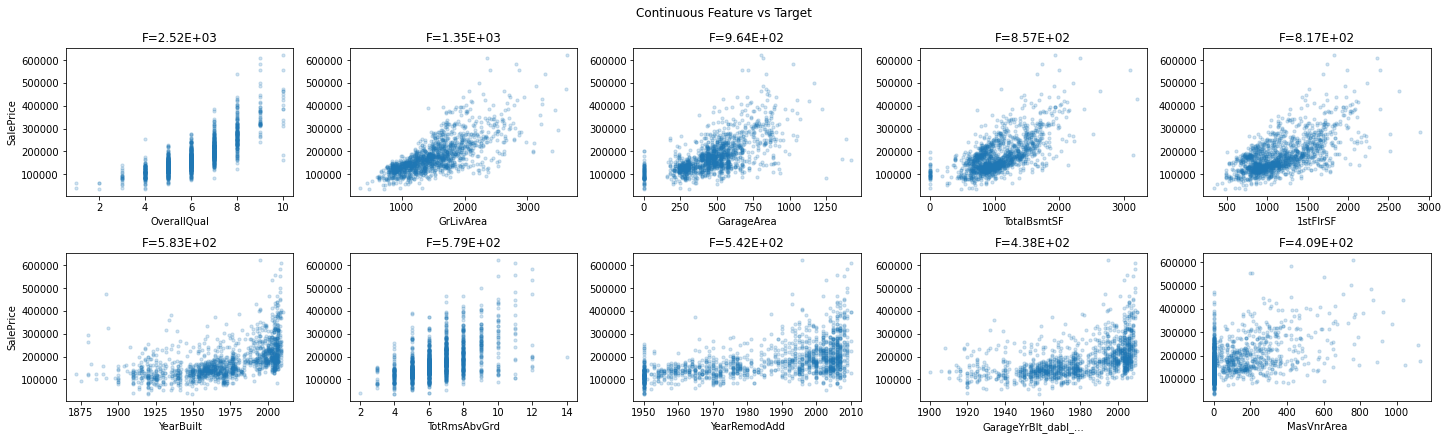

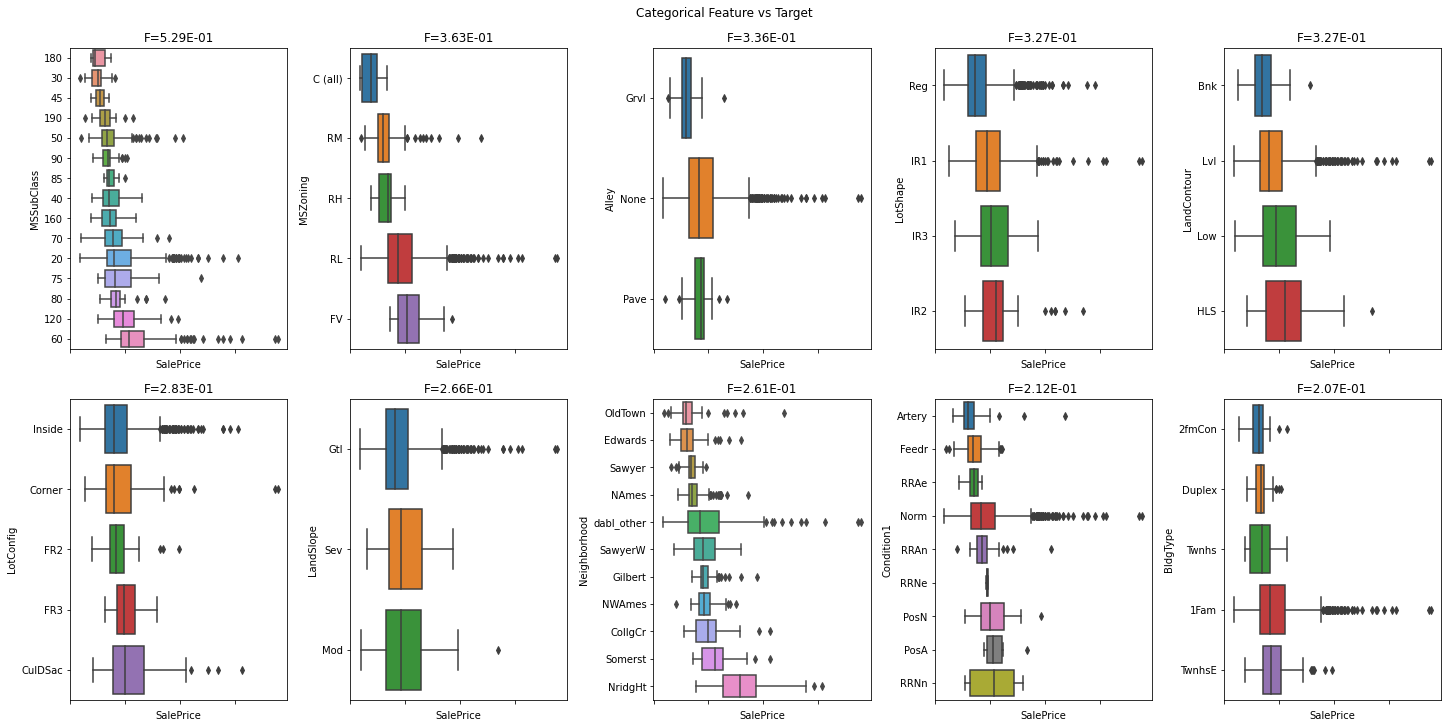

In [29]:
dabl.plot(clean_copy, 'SalePrice')

## Encode the data

In [30]:
# Create a copy

encoded_copy = train_copy.copy()

In [31]:
# Split the data
train, validation = train_test_split(encoded_copy, 
                                     train_size=0.8,
                                     random_state=7)

In [32]:
train['Alley'].dtype

dtype('O')

In [33]:
# Label encode the data
categorical_columns = [v for v in encoded_copy.columns if encoded_copy[v].dtype == 'O']

# Instantiate Encoder
encoder = LabelEncoder()

# Encode the data
for column in categorical_columns:
  train[column] = encoder.fit_transform(train[column].astype(str))

for column in categorical_columns:
  validation[column] = encoder.fit_transform(validation[column].astype(str))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [34]:
validation

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
606,607,20,3,12464,1,1,1,2,0,0,1,5,2,2,0,2,5,5,1996,1996,1,0,9,11,2,0.0,3,1,2,2,3,3,2,732,6,0,308,1040,0,2,1,4,1040,0,0,1040,1,0,1,0,3,1,2,6,5,0,3,4,67,3,2,576,4,5,2,168,0,0,0,0,0,2,0,1,0,11,2009,5,2,152000
1210,1211,60,3,11218,1,1,3,3,0,3,0,20,2,2,0,5,6,5,1992,1992,1,0,10,12,2,0.0,2,2,2,2,3,3,6,0,6,0,1055,1055,0,0,1,4,1055,790,0,1845,0,0,2,1,3,1,2,8,5,1,5,0,60,2,2,462,4,5,2,635,104,0,0,0,0,2,0,3,400,5,2010,5,2,189000
492,493,60,3,15578,1,1,0,3,0,0,0,8,2,2,0,5,6,5,2006,2006,1,0,9,11,2,0.0,2,2,2,2,3,3,6,0,6,0,728,728,0,2,1,4,728,728,0,1456,0,0,2,1,3,1,3,8,5,0,3,0,73,2,2,429,4,5,2,0,0,0,0,0,0,2,4,1,0,5,2006,4,3,172785
410,411,20,3,9571,1,1,3,3,0,3,0,7,2,2,0,2,5,3,1958,1958,1,0,1,1,2,0.0,3,0,1,4,0,3,6,0,6,0,1276,1276,0,4,1,0,1276,0,0,1276,0,0,1,0,3,1,3,5,3,0,3,0,29,3,1,350,4,5,2,0,0,0,0,0,0,2,4,1,0,6,2009,0,0,60000
396,397,20,3,7200,1,1,3,2,0,3,0,5,2,2,0,2,5,5,1972,1972,3,0,5,6,2,0.0,3,2,1,4,3,0,5,777,6,0,117,894,0,4,1,4,894,0,0,894,0,0,1,0,2,1,3,6,5,0,3,4,53,2,2,600,4,5,2,215,0,0,0,0,0,2,4,1,0,9,2009,5,2,123000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,347,20,3,12772,1,1,0,3,0,1,0,12,2,2,0,2,6,8,1960,1998,3,0,5,6,2,0.0,3,1,1,4,3,2,1,498,6,0,460,958,0,4,1,4,958,0,0,958,0,0,1,0,2,1,3,5,5,0,3,0,31,2,1,301,4,5,2,0,0,0,0,0,0,2,4,0,15500,4,2007,5,2,151500
1214,1215,85,3,10205,1,1,0,3,0,3,0,12,2,2,0,6,5,5,1962,1962,1,0,5,6,2,0.0,3,2,1,4,3,0,1,784,6,0,141,925,0,4,1,4,999,0,0,999,1,0,1,0,3,1,3,6,5,0,3,0,33,3,1,300,4,5,2,150,72,0,0,0,0,2,4,1,0,5,2006,5,2,134500
783,784,85,3,9101,1,1,0,3,0,0,0,11,2,2,0,6,5,6,1978,1978,1,0,6,8,1,104.0,3,1,2,2,3,0,2,1097,6,0,0,1097,0,0,1,4,1110,0,0,1110,1,0,1,0,1,1,2,4,5,1,5,0,49,0,2,602,4,5,2,303,30,0,0,0,0,2,4,1,0,7,2009,5,2,165500
740,741,70,4,9600,1,0,3,3,0,3,0,17,2,2,0,5,5,7,1910,2002,1,0,10,13,2,0.0,3,1,0,1,0,3,6,0,6,0,264,264,0,0,1,4,768,664,0,1432,0,0,2,0,2,1,3,7,5,0,3,4,0,3,2,360,4,2,2,270,0,112,0,0,0,2,0,1,0,5,2007,5,0,132000


In [35]:
# Standardize the data
scaler = StandardScaler()

x_train = train.drop('SalePrice', axis=1)
x_val = validation.drop('SalePrice', axis=1)
# Scale the data
train_scaled = scaler.fit_transform(x_train)
val_scaled = scaler.fit_transform(x_val)

In [36]:
y_train = train['SalePrice']
y_val = validation['SalePrice']

In [38]:
x_train_scaled = pd.DataFrame(train_scaled, columns=x_train.columns)
x_val_scaled = pd.DataFrame(val_scaled, columns=x_val.columns)

#### Using Selectfrommodel

In [39]:
# Create a copy
x_train_copy = x_train_scaled.copy()

In [41]:
# Let's fit a lasso regressor to get the best features

selector = SelectFromModel(Lasso(), max_features=15)
selector.fit(x_train_copy, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1775199151.2161865, tolerance: 708975524.4729695
  positive)


SelectFromModel(estimator=Lasso(), max_features=15)

In [43]:
selected_from_model = x_train_copy.columns[selector.get_support()]

#### Using Sequential Feature Selector 

In [67]:
selector_two = SequentialFeatureSelector(Lasso(), n_features_to_select=20, 
                                         scoring='neg_mean_squared_error', cv=5)

selector_two.fit(x_train_copy, y_train)

selector_two_columns = x_train_copy.columns[selector_two.get_support()]

In [68]:
selector_two_columns

Index(['MSSubClass', 'Neighborhood', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'RoofStyle', 'MasVnrArea', 'ExterQual',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'KitchenQual', 'Functional', 'Fireplaces',
       'GarageFinish', 'GarageCars'],
      dtype='object')

#### Using PCA

In [54]:
# Instantiate PCA
pca = PCA(15)

# Fit to the data and transform it
x_train_pca = pca.fit_transform(x_train_copy)

x_val_pca = pca.fit_transform(x_val_scaled)

In [55]:
# Get the explained variance
pca.explained_variance_

array([11.09912063,  4.52549066,  3.83465847,  3.4254951 ,  2.69572973,
        2.29979057,  2.26408631,  1.93726126,  1.85271889,  1.75271482,
        1.72075416,  1.66063468,  1.63035133,  1.61684919,  1.50642832])

#### Use a test model

In [69]:
# Define the data
x_train_one = x_train_copy[selected_from_model]
x_train_two = x_train_copy[selector_two_columns]

x_val_one = x_val_scaled[selected_from_model]
x_val_two = x_val_scaled[selector_two_columns]

In [61]:
def data_tester(model, x_train, y_train, x_test, y_test):
  model.fit(x_train, y_train)
  preds = model.predict(x_test)
  rmse = mean_squared_error(y_test, preds, squared=False)
  return rmse


In [70]:
# Instantiate the test model
ridge = Ridge(random_state=7)

# Fit the model to the data 1
sample_one = data_tester(ridge, x_train_one, y_train, x_val_one, y_val)
sample_two = data_tester(ridge, x_train_two, y_train, x_val_two, y_val)
sample_three = data_tester(ridge, x_train_pca, y_train, x_val_pca, y_val)


# Print the results
print(f'Sample one gives an rmse of : {sample_one}')
print(f'Sample two gives an rmse of : {sample_two}')
print(f'Sample three gives an rmse of : {sample_three}')

Sample one gives an rmse of : 34785.635328222226
Sample two gives an rmse of : 32058.232848982185
Sample three gives an rmse of : 38929.656431274874


The best result comes from our Select features

#### Iterative process to select optimum number of features

In [79]:
 rmses = []
for x in range(5, 30):
  selector_two = SequentialFeatureSelector(Lasso(), n_features_to_select=x, 
                                         scoring='neg_mean_squared_error', cv=5)

  selector_two.fit(x_train_copy, y_train)

  selector_two_columns = x_train_copy.columns[selector_two.get_support()]

  selected_x_train = x_train_copy[selector_two_columns]
  selected_x_val = x_val_scaled[selector_two_columns]
 
  rmse = data_tester(ridge, selected_x_train, y_train, selected_x_val, y_val)
  rmses.append(rmse)

In [80]:
min(rmses)

31366.342306239294

We use 27 features

In [90]:
selector_two = SequentialFeatureSelector(Lasso(), n_features_to_select=27, 
                                         scoring='neg_mean_squared_error', cv=5)

selector_two.fit(x_train_copy, y_train)

selector_two_columns = x_train_copy.columns[selector_two.get_support()]

selected_x_train = x_train_copy[selector_two_columns]
selected_x_val = x_val_scaled[selector_two_columns]

In [86]:
# Scale y_train and y val

scaled_y_train = scaler.fit_transform(y_train.values.reshape(-1,1))
scaled_y_val = scaler.fit_transform(y_val.values.reshape(-1,1))

# Modelling

We shall model using the various models

In [95]:
def model_trainer(models, x_train, y_train, x_test, y_test):
  rmses = []
  for model in models:
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    rmse = mean_squared_error(y_test, preds)
    rmses.append(rmse)

  for model, error in zip(models, rmses):
    print(f'{model} had an rmse of {error}')
    


In [96]:
# Instantiate models
dt = DecisionTreeRegressor()
adaboost = AdaBoostRegressor()
forest = RandomForestRegressor()
xgb_reg = xgb.XGBRegressor()
cat = CatBoostRegressor(silent=True)

# Save in a list
models = [dt, adaboost, forest, xgb_reg, cat]

In [97]:
# Evaluate the models
model_trainer(models, selected_x_train, scaled_y_train, selected_x_val, 
              scaled_y_val)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[07:29:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
DecisionTreeRegressor() had an rmse of 0.254238726962975
AdaBoostRegressor() had an rmse of 0.21753280809622563
RandomForestRegressor() had an rmse of 0.14201219260075745
XGBRegressor() had an rmse of 0.11813119763736814
<catboost.core.CatBoostRegressor object at 0x7f3fa6c8f810> had an rmse of 0.1386384856262832


Our best model is XGB